In [1]:
# thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# 2. Load data from MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

(50000, 28, 28)


Dữ liệu input cho mô hình convolutional neural network là 1 tensor 4 chiều (N, W, H, D)

In [3]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [4]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
# 5. Định nghĩa model 
model = Sequential()

# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3, dùng hàm sigmoid làm activation
# và chỉ rõ input_shape nếu là layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

In [6]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [7]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
              batch_size=32, epochs=10, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 43s 856us/step - loss: 0.2807 - accuracy: 0.9188 - val_loss: 0.0683 - val_accuracy: 0.9826
Epoch 2/10
50000/50000 [==============================] - 47s 944us/step - loss: 0.0600 - accuracy: 0.9825 - val_loss: 0.0614 - val_accuracy: 0.9823
Epoch 3/10
50000/50000 [==============================] - 42s 849us/step - loss: 0.0370 - accuracy: 0.9896 - val_loss: 0.0437 - val_accuracy: 0.9866
Epoch 4/10
50000/50000 [==============================] - 44s 874us/step - loss: 0.0250 - accuracy: 0.9928 - val_loss: 0.0485 - val_accuracy: 0.9850
Epoch 5/10
50000/50000 [==============================] - 42s 839us/step - loss: 0.0155 - accuracy: 0.9960 - val_loss: 0.0394 - val_accuracy: 0.9881
Epoch 6/10
50000/50000 [==============================] - 40s 795us/step - loss: 0.0101 - accuracy: 0.9976 - val_loss: 0.0428 - val_accuracy: 0.9885
Epoch 7/10
50000/50000 [==============================] 

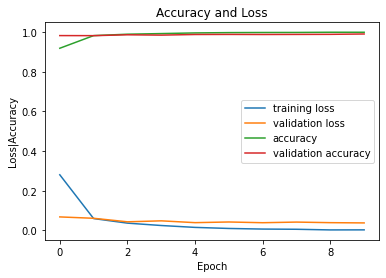

In [8]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [9]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03434844967466051, 0.989300012588501]


Giá trị dự đoán:  1


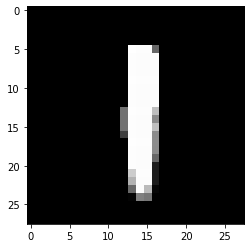

In [10]:
# 10. Dự đoán ảnh
plt.imshow(X_test[345].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[345].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))